In [1]:
import pickle
import sys

import numpy as np
import pandas as pd

sys.path.append('../../src')
import raybay

# Format Plans

Goal and function DataFrames are not saved correctly from remote.

In [2]:
# Approved plan
approved = np.load('approved/res_approved.pkl', allow_pickle=True)
approved.func_df = raybay.get_funcs('approved/funcs.csv')
approved.goal_df = pd.read_csv('goals.csv')
pickle.dump(approved, open('approved/res_approved.pkl', 'wb'))

In [3]:
# Default plan
default = np.load('default/res_default.pkl', allow_pickle=True)
default.func_df = raybay.get_funcs('default/funcs.csv')
default.goal_df = pd.read_csv('goals.csv')
pickle.dump(default, open('default/res_default.pkl', 'wb'))

## Grid Search (2D)

Computed in batches due to connection timing out.

In [4]:
# Load 2D grid search results
goal_dict_1 = np.load('grid/goal_dict_1.pkl', allow_pickle=True) # (0,0) - (100,2700)
goal_dict_2 = np.load('grid/goal_dict_2.pkl', allow_pickle=True) # (200,0) - (700,100)
goal_dict_3 = np.load('grid/goal_dict_3.pkl', allow_pickle=True) # (100,2800) - (100,4000)
goal_dict_4 = np.load('grid/goal_dict_4.pkl', allow_pickle=True) # (700,0) - (1200,2000)
goal_dict_5 = np.load('grid/goal_dict_5.pkl', allow_pickle=True) # (1200,2100) - (1200,4000)
goal_dict_6 = np.load('grid/goal_dict_6.pkl', allow_pickle=True) # (1300,0) - (1500,2200)
goal_dict_7 = np.load('grid/goal_dict_7.pkl', allow_pickle=True) # (1500,2300) - (1500,4000)
goal_dict_8 = np.load('grid/goal_dict_8.pkl', allow_pickle=True) # (1600,0) - (2400,4000)

In [5]:
# Compile clinical goal results
d2cm = np.arange(0, 2500, 100)
rib = np.arange(0, 4100, 100)
goal_dict = {ii: goal_dict_1[ii].copy() for ii in goal_dict_1}
for ii in goal_dict:
    goal_dict[ii] += goal_dict_3[ii]
    goal_dict[ii] += goal_dict_2[ii][:-2]
    goal_dict[ii] += goal_dict_4[ii]
    goal_dict[ii] += goal_dict_5[ii]
    goal_dict[ii] += goal_dict_6[ii]
    goal_dict[ii] += goal_dict_7[ii]
    goal_dict[ii] += goal_dict_8[ii]
x_iters = [[ii, jj] for ii in d2cm for jj in rib]

In [6]:
# Read log files to get flags
flag_list_1 = []
f = open('grid/log_grid_1.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_1.append(flag)
f.close()

flag_list_2 = []
f = open('grid/log_grid_2.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_2.append(flag)
f.close()

flag_list_3 = []
f = open('grid/log_grid_3.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_3.append(flag)
f.close()

flag_list_4 = []
f = open('grid/log_grid_4.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_4.append(flag)
f.close()

flag_list_5 = []
f = open('grid/log_grid_5.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_5.append(flag)
f.close()

flag_list_6 = []
f = open('grid/log_grid_6.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_6.append(flag)
f.close()

flag_list_7 = []
f = open('grid/log_grid_7.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_7.append(flag)
f.close()

flag_list_8 = []
f = open('grid/log_grid_8.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_8.append(flag)
f.close()

In [7]:
# Compile flag lists
flag_list = flag_list_1.copy()
flag_list += flag_list_3
flag_list += flag_list_2[:-2]
flag_list += flag_list_4
flag_list += flag_list_5
flag_list += flag_list_6
flag_list += flag_list_7
flag_list += flag_list_8

In [8]:
# Save raybay result
grid = raybay.RaybayResult(
    default.patient,
    default.case,
    default.plan,
    'grid/funcs.csv',
    ('PTV', 4800, 95),
    'goals.csv')
grid.opt_result = raybay.OptimizeResult(x_iters)
grid.flag_list = flag_list
grid.goal_dict = goal_dict
pickle.dump(grid, open('grid/res_grid.pkl', 'wb'))

## Optimized plans (2D)

In [9]:
# Random search
dummy = np.load('grid/res_lin_dummy_minimize.pkl', allow_pickle=True)
dummy.func_df = raybay.get_funcs('grid/funcs.csv')
dummy.goal_df = pd.read_csv('grid/goals_lin.csv')
pickle.dump(dummy, open('grid/res_lin_dummy_minimize.pkl', 'wb'))

In [10]:
# Bayesian search (linear)
bayes_lin = np.load('grid/res_lin_gp_minimize.pkl', allow_pickle=True)
bayes_lin.func_df = raybay.get_funcs('grid/funcs.csv')
bayes_lin.goal_df = pd.read_csv('grid/goals_lin.csv')
pickle.dump(bayes_lin, open('grid/res_lin_gp_minimize.pkl', 'wb'))

In [12]:
# Bayesian search (linear-quadratic)
bayes_linquad = np.load('grid/res_linquad_gp_minimize.pkl', allow_pickle=True)
bayes_linquad.func_df = raybay.get_funcs('grid/funcs.csv')
bayes_linquad.goal_df = pd.read_csv('grid/goals_linquad.csv')
pickle.dump(bayes_linquad, open('grid/res_linquad_gp_minimize.pkl', 'wb'))

## Optimized plans (10D)

In [39]:
# Bayesian search (linear)

In [13]:
# Bayesian search (linear-quadratic)
bayes_linquad = np.load('bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
bayes_linquad.func_df = raybay.get_funcs('bayes/funcs.csv')
bayes_linquad.goal_df = pd.read_csv('bayes/goals_linquad.csv')
pickle.dump(bayes_linquad, open('bayes/res_linquad_gp_minimize.pkl', 'wb'))

(-500.0, -400.0)

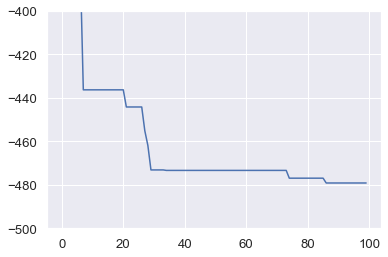

In [18]:
plt.plot(np.minimum.accumulate(bayes_linquad.opt_result.func_vals))
plt.ylim([-500,-400])